In [12]:
#2a
import pandas as pd

# Reemplaza 'tu_archivo.dta' por el nombre exacto de tu archivo
df05 = pd.read_stata('usu_individual_t105.dta')

# Reemplaza 'tu_archivo.dta' por el nombre exacto de tu archivo
df25 = pd.read_excel('usu_individual_T125.xlsx')

# Muestra las primeras filas para verificar
df05.head()
df25.head()

print(df05.head())
print(df25.head())



     CODUSU  nro_hogar componente  h15    ano4       trimestre  \
0  125098          1.0        1.0   Sí  2005.0  1er. Trimestre   
1  125188          1.0        1.0   Sí  2005.0  1er. Trimestre   
2  125188          1.0        2.0   Sí  2005.0  1er. Trimestre   
3  125188          1.0        3.0  0.0  2005.0  1er. Trimestre   
4  125242          1.0        1.0   Sí  2005.0  1er. Trimestre   

              region mas_500              aglomerado  pondera  ... deccfr  \
0  Gran Buenos Aires       S  Ciudad de Buenos Aires   1017.0  ...     08   
1  Gran Buenos Aires       S  Ciudad de Buenos Aires   1062.0  ...     02   
2  Gran Buenos Aires       S  Ciudad de Buenos Aires   1062.0  ...     02   
3  Gran Buenos Aires       S  Ciudad de Buenos Aires   1062.0  ...     02   
4  Gran Buenos Aires       S  Ciudad de Buenos Aires   1103.0  ...     09   

  ideccfr rdeccfr gdeccfr pdeccfr adeccfr pj1_1 pj2_1 pj3_1 idimpp  
0              07      08              05   0.0   0.0   0.0  00000  
1 

In [13]:
#2a

#Limpieza del resto de regiones y queda solo Patagonia


# Pongo mismo nombre de columnas (region)
df05.columns = [c.strip().lower() for c in df05.columns]
df25.columns = [c.strip().lower() for c in df25.columns]

# Función para filtrar Patagonia: recibe un DataFrame y el nombre de la columna de región (por defecto "region"). 
# Verifica que exista esa columna. Si no existe, lanza un error claro.
def filtrar_patagonia(df, col_region="region"):
    if col_region not in df.columns:
        raise ValueError(f"No se encontró la columna '{col_region}'.")
    s = df[col_region]
    mask = (
        s.astype(str).str.upper().eq("PATAGÓNICA") |    # caso texto (2005)
        pd.to_numeric(s, errors="coerce").eq(44)        # caso código (2025)
    )
    return df.loc[mask].copy()

# Aplico el filtro --> Resultado: dos DataFrames que contienen solo observaciones de la región NEA para cada año.
pat05 = filtrar_patagonia(df05, "region")
pat25 = filtrar_patagonia(df25, "region")

# Chequeos rápidos (cantidad de filas y columnas)
print("----- 2005 -----")
print("Filas totales:", len(df05), " | Filas Patagonia:", len(pat05))
print("Columnas totales:", len(df05.columns))
print("Columnas después del filtro:", len(pat05.columns))

print("\n----- 2025 -----")
print("Filas totales:", len(df25), " | Filas Patagonia:", len(pat25))
print("Columnas totales:", len(df25.columns))
print("Columnas después del filtro:", len(pat25.columns))

print("\nEjemplo valores únicos de 'region' en 2005:", pat05["region"].unique()[:5])
print("Ejemplo valores únicos de 'region' en 2025:", pat25["region"].unique()[:5])

print("Regiones únicas en 2005 filtradas:", pat05["region"].unique())
print("Regiones únicas en 2025 filtradas:", pat25["region"].unique())

----- 2005 -----
Filas totales: 47030  | Filas Patagonia: 3229
Columnas totales: 176
Columnas después del filtro: 176

----- 2025 -----
Filas totales: 45425  | Filas Patagonia: 5359
Columnas totales: 235
Columnas después del filtro: 235

Ejemplo valores únicos de 'region' en 2005: ['Patagónica']
Categories (6, object): ['Gran Buenos Aires' < 'NOA' < 'NEA' < 'Cuyo' < 'Pampeana' < 'Patagónica']
Ejemplo valores únicos de 'region' en 2025: [44]
Regiones únicas en 2005 filtradas: ['Patagónica']
Categories (6, object): ['Gran Buenos Aires' < 'NOA' < 'NEA' < 'Cuyo' < 'Pampeana' < 'Patagónica']
Regiones únicas en 2025 filtradas: [44]


In [14]:
#2a diccionarios para recodificar variables y llevarlas al mismo formato


import numpy as np
import pandas as pd

# --- 0) Variables de interés ---
cols_interes = [
    "ch04","ch06","ch07","ch08","nivel_ed","estado","cat_inac",
    "ipcf","ch15","ch09","pp10a","pp3e_tot","pp07a","pp10e","cat_ocup"
]

# --- 1) Diccionarios corregidos para 2005 (sirven también si hay texto en 2025) ---
est_civil = {"Unido":1,"Casado":2,"Separado o divorciado":3,"Viudo":4,"Soltero":5,"Ns./Nr.":9}
cob_medica = {
    "Obra social (incluye PAMI)":1,
    "Mutual/Prepaga/Servicio de emergencia":2,
    "Planes y seguros públicos":3,
    "No paga ni le descuentan":4,
    "Ns./Nr.":9,
    "Obra social y mutual/prepaga/servicio de emergencia":12,
    "Obra social y planes y seguros públicos":13,
    "Mutual/prepaga/servicio de emergencia/planes y seguros públicos":23,
    "Obra social, mutual/prepaga/servicio de emergencia y Planes y Seguros Públicos":123
}
alfab = {"Sí":1,"No":2,"Menor de 2 años":3,"Ns./Nr.":9, 0.0: np.nan}
nivel_ed_map = {
    "Primaria Incompleta":1,"Primaria Completa":2,"Secundaria Incompleta":3,"Secundaria Completa":4,
    "Superior Universitaria Incompleta":5,"Superior Universitaria Completa":6,"Sin instrucción":7,
    "Ns./Nr":9,"Ns./Nr.":9
}
cond_act = {"Entrevista individual no realizada (no respuesta al cuestion)":0,
            "Ocupado":1,"Desocupado":2,"Inactivo":3,"Menor de 10 años":4}
inactividad = {"Jubilado/pensionado":1,"Rentista":2,"Estudiante":3,"Ama de casa":4,
               "Menor de 6 años":5,"Discapacitado":6,"Otros":7, 0.0: np.nan}
nacimiento = {"En esta localidad":1,"En otra localidad":2,"En otra provincia (especificar)":3,
              "En un país limítrofe":4,"En otro país":5,"Ns./Nr":9,"Ns./Nr.":9}
busca_trab = {"...menos de 1 mes?":1,"...de 1 a 3 meses?":2,"...más de 3 a 6 meses?":3,
              "...más de 6 a 12 meses?":4,"...más de 1 año?":5}
tiempo_trabajando = {"Menos de un mes":1,"1 a 3 meses":2,"Más de 3 a 6 meses":3,
                     "Más de 6 a 12 meses":4,"Más de 1 a 5 años":5,"Más de 5 años":6,"Ns./Nr.":9}
tiempo_desocupado = {"...menos de 1 mes?":1,"...de 1 a 3 meses?":2,"...más de 3 a 6 meses?":3,
                     "...más de 6 a 12 meses?":4,"...más de 1 a 3 años?":5,"...más de 3 años?":6}
cat_ocup_map = {"Patrón":1,"Cuenta propia":2,"Obrero o empleado":3,
                "Trabajador familiar sin remuneración":4, 0.0: np.nan}

In [23]:
# Código que me pasó Tomi tutor, recodificacion de las bases para fusionarlas y trabajar con la base entera

sexo_map = {"Varón": 1, "Mujer": 2}

pat05_num = pat05.copy()

pat05_num["ch04"] = pat05_num["ch04"].map(sexo_map)
pat05_num["ch07"] = pat05_num["ch07"].map(est_civil)
pat05_num["ch08"] = pat05_num["ch08"].map(cob_medica)
pat05_num["nivel_ed"] = pat05_num["nivel_ed"].map(nivel_ed_map)
pat05_num["estado"] = pat05_num["estado"].map(cond_act)
pat05_num["cat_inac"] = pat05_num["cat_inac"].map(inactividad)
pat05_num["ch15"] = pat05_num["ch15"].map(nacimiento)
pat05_num["ch09"] = pat05_num["ch09"].map(alfab)
pat05_num["pp10a"] = pat05_num["pp10a"].map(busca_trab)
pat05_num["pp07a"] = pat05_num["pp07a"].map(tiempo_trabajando)
pat05_num["pp10e"] = pat05_num["pp10e"].map(tiempo_desocupado)
pat05_num["cat_ocup"] = pat05_num["cat_ocup"].map(cat_ocup_map)

cols_interes = [
    "ch04","ch06","ch07","ch08","nivel_ed","estado","cat_inac",
    "ipcf","ch15","ch09","pp10a","pp3e_tot","pp07a","pp10e","cat_ocup", "ano4"
]

pat05_num = pat05_num[cols_interes]
pat25_num = pat25[cols_interes]

patagonia_filtrada = pd.concat([pat05_num, pat25_num], axis=0, ignore_index=True)

=== Tabla de faltantes por año ===
          2005  2025
ch04         0     0
ch06         0     0
ch07         0     0
ch08         0     0
nivel_ed   692     0
estado       2     0
cat_inac  1385     0
ipcf         0     0
ch15         0     0
ch09         1     0
pp10a     3127  5237
pp3e_tot     0  3036
pp07a     2226  3036
pp10e     3139  5237
cat_ocup  1868     0
ano4         0     0


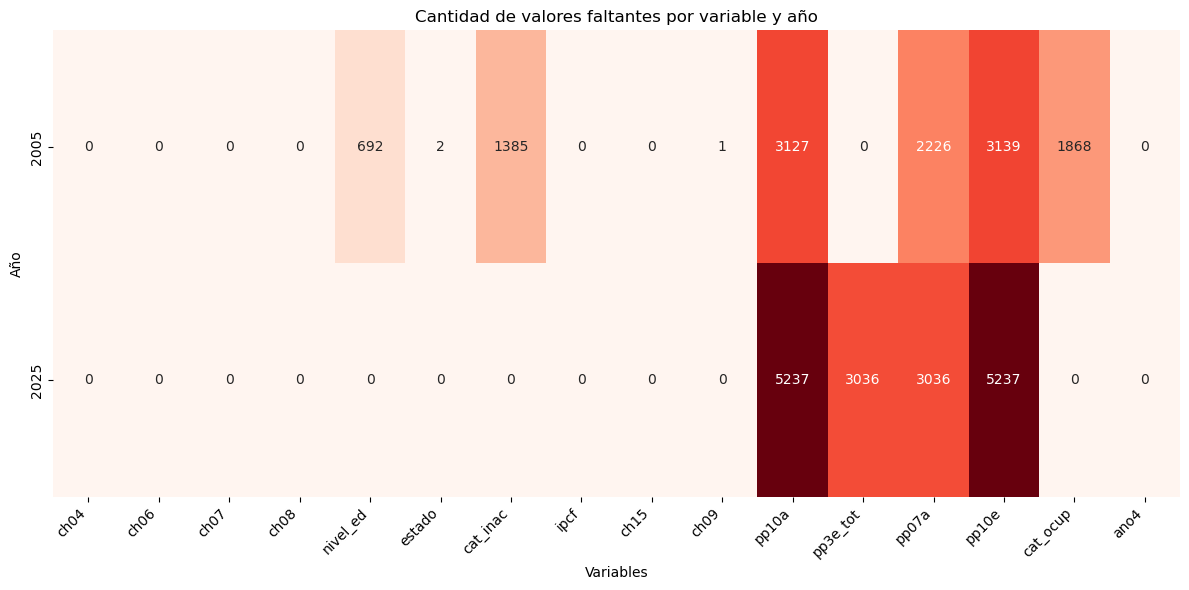


Top variables con más faltantes en 2005:
pp10e       3139
pp10a       3127
pp07a       2226
cat_ocup    1868
cat_inac    1385
Name: 2005, dtype: int64

Top variables con más faltantes en 2025:
pp10e       5237
pp10a       5237
pp3e_tot    3036
pp07a       3036
ch04           0
Name: 2025, dtype: int64


In [18]:
#2b 

#Heatmap de datos faltantes por año


#Paso 2. Contar valores faltantes por variable
na_2005 = pat05_num.isna().sum()
na_2025 = pat25_num.isna().sum()

na_summary = pd.DataFrame({"2005": na_2005, "2025": na_2025})
print("=== Tabla de faltantes por año ===")
print(na_summary)

#Paso 3. Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.heatmap(na_summary.T, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.title("Cantidad de valores faltantes por variable y año")
plt.xlabel("Variables")
plt.ylabel("Año")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#Paso 4. Identificar cuáles tienen más faltantes
print("\nTop variables con más faltantes en 2005:")
print(na_summary["2005"].sort_values(ascending=False).head())

print("\nTop variables con más faltantes en 2025:")
print(na_summary["2025"].sort_values(ascending=False).head())

# En la comparación de 2005 y 2025, se observa que las variables con más valores faltantes de 2005 son ch04, ch07, ch08, ch015 y estado,  
# donde concentran 16.145 casos. En cuanto al 2025,se observa que las variables con más valores faltantes son pp10a, pp10e, pp07a, pp3e_tot 
# que concentran 16.546 casos. El resto de las variables presentan muy pocos o ningún valor perdido. Esto sugiere que la calidad de los 
# datos es mayor en las variables básicas (como sexo o edad), mientras que la información más sensible (como ingresos o cobertura médica) 
# presenta mayores problemas de no respuesta.

In [20]:
#2c

# Copiar la base para no pisar el original
patagonia_limpia = patagonia_filtrada.copy()

# 1. Ingresos negativos -> NaN: nunca deberían ser negativos.
patagonia_limpia.loc[patagonia_limpia["ipcf"] < 0, "ipcf"] = np.nan

# 2. Horas de trabajo fuera de rango razonable (ej. <0 o >100) -> NaN: no debería haber valores negativos o absurdamente altos
patagonia_limpia.loc[(patagonia_limpia["pp3e_tot"] < 0) | (patagonia_limpia["pp3e_tot"] > 100), "pp3e_tot"] = np.nan

# 3. Reglas de validación por categorías: no deben aparecer códigos fuera del rango definido en los diccionarios  
valid_ranges = {
    "ch04": [1, 2],
    "ch07": [1, 2, 3, 4, 5],
    "ch08": [1, 2, 3, 4, 9, 12, 13, 23, 123],
    "nivel_ed": [1, 2, 3, 4, 5, 6, 7, 9],
    "estado": [0, 1, 2, 3, 4],
    "cat_inac": [1, 2, 3, 4, 5, 6, 7],
    "ch15": [1, 2, 3, 4, 5, 9],
    "ch09": [1, 2, 3],
    "pp10a": [1, 2, 3, 4, 5],
    "pp07a": [1, 2, 3, 4, 5, 6, 9],
    "pp10e": [1, 2, 3, 4, 5, 6],
    "cat_ocup": [1, 2, 3, 4]
}

for col, valid_vals in valid_ranges.items():
    patagonia_limpia.loc[~patagonia_limpia[col].isin(valid_vals), col] = np.nan

print("Valores faltantes después de limpieza:")
print(patagonia_limpia.isna().sum().sort_values(ascending=False).head(10))

#Durante la etapa de limpieza se corrigieron valores fuera de rango en las variables seleccionadas. En particular, se reemplazaron como 
#faltantes los ingresos negativos en ipcf y las horas semanales de trabajo menores a 0 o mayores a 100 en pp3e_tot. Asimismo, se 
#recodificaron como NaN aquellas categorías que aparecían fuera de los valores válidos definidos por la codificación de la EPH 
#(por ejemplo, códigos no reconocidos en estado civil, cobertura médica o nivel educativo). Este proceso asegura que los análisis 
#posteriores se realicen únicamente con datos consistentes.


Valores faltantes después de limpieza:
pp10e       8395
pp10a       8364
pp07a       5861
cat_ocup    4811
cat_inac    3841
pp3e_tot    3040
nivel_ed     692
estado         2
ch09           2
ipcf           0
dtype: int64


=== Tabla de faltantes por año ===
          2005  2025
ch04         0     0
ch06         0     0
ch07         0     0
ch08         0     0
nivel_ed   692     0
estado       2     0
cat_inac  1385  2456
ipcf         0     0
ch15         0     0
ch09         1     1
pp10a     3127  5237
pp3e_tot     2  3038
pp07a     2226  3635
pp10e     3139  5256
cat_ocup  1868  2943
ano4         0     0


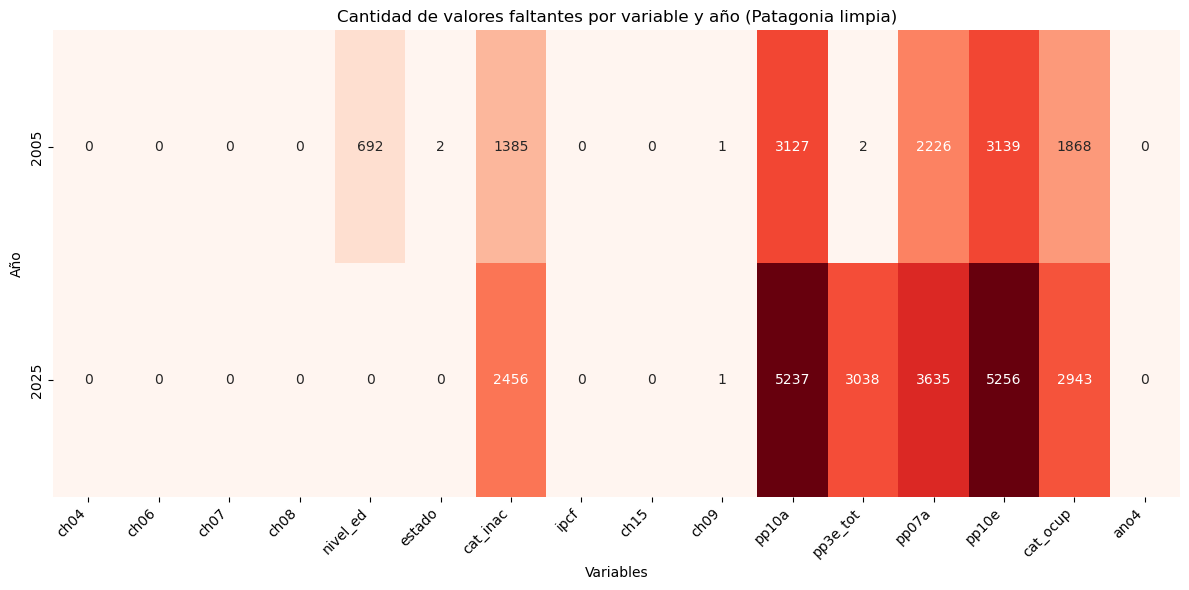


Top variables con más faltantes en 2005:
pp10e       3139
pp10a       3127
pp07a       2226
cat_ocup    1868
cat_inac    1385
Name: 2005, dtype: int64

Top variables con más faltantes en 2025:
pp10e       5256
pp10a       5237
pp07a       3635
pp3e_tot    3038
cat_ocup    2943
Name: 2025, dtype: int64


In [22]:
#2c heatmap de la ultima base de datos con todos los valores corregidos

pat05_num = patagonia_limpia[patagonia_limpia["ano4"] == 2005]
pat25_num = patagonia_limpia[patagonia_limpia["ano4"] == 2025]

na_2005 = pat05_num.isna().sum()
na_2025 = pat25_num.isna().sum()

na_summary = pd.DataFrame({"2005": na_2005, "2025": na_2025})
print("=== Tabla de faltantes por año ===")
print(na_summary)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.heatmap(na_summary.T, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.title("Cantidad de valores faltantes por variable y año (Patagonia limpia)")
plt.xlabel("Variables")
plt.ylabel("Año")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

print("\nTop variables con más faltantes en 2005:")
print(na_summary["2005"].sort_values(ascending=False).head())

print("\nTop variables con más faltantes en 2025:")
print(na_summary["2025"].sort_values(ascending=False).head())

